# NLP

En esta clase aprendimos los siguientes conceptos:

- Stop words
- Palabra raiz (Lemma)
- Tokenizado
- Vectorizado (BOW / TFIDF)

Ahora veremos como hacer esto en python.

Para NLP introduciremos algunas librerías nuevas, una de ellas es [Spacy](https://spacy.io/).

Otras librerías conocidas son:
- nltk
- gensim

Y una librería que es de lo mejor que hay en NLP actualmente: Hugging face.

Comenzaremos esta clase con Spacy. Ya viene pre-instalada en google colab por lo que no será necesario instalarla. Si luego trabajan en algún entorno en el que no este instalada, pueden seguir el tutorial de la página oficial.

Para usar spacy, debemos descargar un modelo del lenguaje que vayamos a trabajar. En este caso estaremos trabajando con textos en inglés (ya está descargado en colab), pero si en otro momento utilizan otro idioma, deben descargarlo desde https://spacy.io/models.

Ahora, importemos spacy y carguemos el modelo en inglés que utilizaremos en este notebook:




In [1]:
# %pip install -U pip setuptools wheel

In [2]:
# %pip install -U spacy

In [3]:
# !python -m spacy download en_core_web_sm

In [ ]:
# !python -m spacy download es_core_news_sm

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

### Carga de datos

El siguiente comando descargará un dataset de reviews de películas (en inglés) en su entorno de colab.

Luego de correr la siguiente celda, deberían ver en su entorno el directorio "acllmdb" que dentro contiene los datos.



In [6]:
#!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#!tar xvzf /content/aclImdb_v1.tar.gz

Si navegan el directorio que tiene los datos, veran que hay un directorio train y otro test.

A su vez, dentro de cada uno de ellos podrán ver los directorios neg y pos. Ahi se encuentran los datos que utilizaremos hoy. 

En neg se encuentran reviews negativas, en pos review positivas.

La siguiente celda, lista los nombres de los archivos que hay en /content/aclImdb/test/pos.

Ven algo raro?


In [7]:
# %ls aclImdb_v1\test

Podemos ver que cada review está en un archivo .txt distinto. ¿Cómo podemos leer este tipo de archivos en pandas? Hasta ahora veníamos levantando únicamente CSVs.

En python, se pueden abrir achivos con el comando:



```
with open("ruta_al_archivo", modo_de_lectura) as f:
  # Acá ya tenemos acceso al archivo con el nombre f
```

donde modo_de_lectura puede ser:

- r: read
- w: write
- a: append

Más detalles: https://www.w3schools.com/python/ref_func_open.asp

Además, si importamos el paquete 

```
import os
```

podremos utilizar una función para listar el nomrbe de todos los archivos que se encuentran en un directorio:

```
os.listdir("directorio")
```

Entonces, lo que vamos a hacer es abrir el directorio donde se encuentran los archivos y leerlos uno por uno. A todo esto lo guardaremos luego en un dataframe de pandas.

Ejemplo de listado de reviews negativas con os.listdir:

In [8]:
import os

os.listdir("aclImdb_v1/train/neg")

['0_3.txt',
 '10000_4.txt',
 '10001_4.txt',
 '10002_1.txt',
 '10003_1.txt',
 '10004_3.txt',
 '10005_3.txt',
 '10006_4.txt',
 '10007_1.txt',
 '10008_2.txt',
 '10009_1.txt',
 '1000_4.txt',
 '10010_3.txt',
 '10011_3.txt',
 '10012_1.txt',
 '10013_1.txt',
 '10014_2.txt',
 '10015_2.txt',
 '10016_4.txt',
 '10017_4.txt',
 '10018_3.txt',
 '10019_3.txt',
 '1001_4.txt',
 '10020_3.txt',
 '10021_2.txt',
 '10022_4.txt',
 '10023_1.txt',
 '10024_3.txt',
 '10025_1.txt',
 '10026_2.txt',
 '10027_1.txt',
 '10028_2.txt',
 '10029_1.txt',
 '1002_3.txt',
 '10030_1.txt',
 '10031_2.txt',
 '10032_4.txt',
 '10033_1.txt',
 '10034_1.txt',
 '10035_1.txt',
 '10036_1.txt',
 '10037_1.txt',
 '10038_3.txt',
 '10039_1.txt',
 '1003_3.txt',
 '10040_2.txt',
 '10041_1.txt',
 '10042_1.txt',
 '10043_1.txt',
 '10044_1.txt',
 '10045_1.txt',
 '10046_1.txt',
 '10047_1.txt',
 '10048_4.txt',
 '10049_1.txt',
 '1004_4.txt',
 '10050_2.txt',
 '10051_4.txt',
 '10052_4.txt',
 '10053_4.txt',
 '10054_1.txt',
 '10055_3.txt',
 '10056_2.txt',
 

Ahora, con un bucle for leemos todas las reviews negativas y las guardamos en una lista:

In [9]:
dir_neg_train = "aclImdb_v1/train/neg/"
neg_reviews = []

for f in os.listdir(dir_neg_train):
  with open(f"{dir_neg_train}/{f}", encoding='utf-8') as neg:
    neg_reviews.append(neg.read())

Imprimimos las primeras 3 para corroborar que nuestro código funcione bien:

In [10]:
neg_reviews[:3]

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [11]:
len(neg_reviews)

12500

Ahora, debemos hacer lo mismo con las negativas de test y luego con las positivas.

En nuestro caso, vamos a hacer nuestro propio train/test split, por lo que las a reviews que están en el directorio de test las guardaremos en la misma lista que recién.

Agregar a la lista "neg_reviews" las reviews negativas de test:

In [12]:
dir_neg_test = "aclImdb_v1/test/neg/"
for f in os.listdir(dir_neg_test):
  with open(f"{dir_neg_test}/{f}",encoding='utf-8') as neg:
    neg_reviews.append(neg.read())

Imprimir el largo de la nueva lista para corroborar que se hayan agregado todas las reviews (deberían tener 25mil)

In [13]:
#COMPLETAR
len(neg_reviews)

25000

tqdm permite implementar una ***barra de progreso*** en Jupyter Notebook o Google Colab. La biblioteca tqdm es útil para mostrar el progreso de bucles u operaciones que pueden llevar mucho tiempo y proporciona una indicación visual del avance del proceso.

In [14]:
# %pip install ipywidgets --upgrade

Ahora, hacer lo mismo con las pos:

In [15]:
#COMPLETAR
#COMPLETAR
#!pip install tqdm 

from tqdm.notebook import tqdm

dir_pos_train = "aclImdb_v1/train/pos/"
dir_pos_test = "aclImdb_v1/test/pos/"
pos_reviews = []

for f in tqdm(os.listdir(dir_pos_train)):
  with open(f"{dir_pos_train}/{f}", encoding= 'utf-8') as pos:
    pos_reviews.append(pos.read())

for f in tqdm(os.listdir(dir_pos_test)):
  with open(f"{dir_pos_test}/{f}",encoding= 'utf-8') as pos:
    pos_reviews.append(pos.read())

print(pos_reviews[:3])
print(len(pos_reviews))


  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from

Deberían tener 25mil reviews de cada tipo.

Ahora, almacenaremos estos datos en un dataframe de pandas para trabajar de forma más simple.

In [16]:
import pandas as pd 
pos_df = pd.DataFrame(pos_reviews, columns=["REVIEW"])
pos_df["TARGET"] = "POS"
neg_df = pd.DataFrame(neg_reviews, columns=["REVIEW"])
neg_df["TARGET"] = "NEG"

df = pd.concat([pos_df, neg_df], axis="rows")
df.sample(5)

,REVIEW,TARGET
24754,This is another Alien imitation and not a very...,NEG
16150,...an incomprehensible script (when it shouldn...,NEG
13840,This could have been a really good movie if so...,NEG
23920,"Allegedly the ""true story"" of Juana de Castill...",NEG
5619,I voted this a 10 out of 10 simply because it ...,POS


In [17]:
df.shape

(50000, 2)

In [18]:
df.sample(5)

,REVIEW,TARGET
1549,I dug out from my garage some old musicals and...,POS
4720,Peter Bogdonavich has made a handful of truly ...,POS
21089,I watched the movie about 13 yrs ago while liv...,POS
10882,Overall I found this movie quite amusing and f...,POS
17808,"I don't know who financed it, or why, but this...",NEG


Ya tenemos nuestro dataframe listo para trabajar.

### Spacy

Como dijimos anteriormente, trabajaremos con la librería spacy. Siempre debemos importarla e instanciarla llamando a nuestro lenguaje. Si queremos instanciarla con un lenguaje que no tenemos descargado, nos dará un error y ahi podemos copiar y pegar el código para descargar el mismo.

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

Para tokenizar un texto en spacy, simplemente utilizamos el objeto que instanciamos (que en este caso llamamos nlp)

Por ejemplo:

In [20]:
nlp("Hi, how are you ?")

Hi, how are you ?

Si queremos acceder a cada uno de los tokens, podemos utilizar por ejemplo un bucle for:

In [21]:
for token in nlp("Hi, how are you ?"):
  print(token)
  print("---")

Hi
---
,
---
how
---
are
---
you
---
?
---


### Stop words

En spacy, tenemos para cada idioma un listado de stop words por defecto (que podemos modificar agregando o quitando las que necesitemos).

Ejecutando la siguiente celda, podemos ver el listado que viene por defecto para el idioma inglés.

In [22]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

Si queremos agregar una stopword, podemos hacerlo con el método .add() de las listas.

Por ejemplo, imaginen que queremos agregar la palabra "test".

Primero validamos si existe en la lista:


In [23]:
"test" in nlp.Defaults.stop_words

False

No existe, la agreguemos:

In [24]:
nlp.Defaults.stop_words.add("test")

In [25]:
"test" in nlp.Defaults.stop_words

True

Ahora si existe.

Para saber si un token es una stopword o no, podemos utilizar el atributo is_stop de un token.

Veamos un ejemplo:

In [26]:
nlp('is')[0].is_stop

True

In [27]:
for token in nlp("My name is Alexis. I am 25 years old and I live in BsAs."):
  if token.is_stop:
    print(f"La palabra: {token.text} es una stop word.")

La palabra: My es una stop word.
La palabra: name es una stop word.
La palabra: is es una stop word.
La palabra: I es una stop word.
La palabra: am es una stop word.
La palabra: and es una stop word.
La palabra: I es una stop word.
La palabra: in es una stop word.


De esta forma, podemos limpiar las stop words de un texto. Veamos un ejemplo en el que limpiamos las stop words del texto "My name is Alexis. I am 25 years old and I live in BsAs.".

In [28]:
def clean_stop_words(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop:
      clean_text.append(token.text)

  return " ".join(clean_text)

In [29]:
texto = "My name is Alexis. I am 25 years old and I live in BsAs !"

clean_stop_words(texto)

'Alexis . 25 years old live BsAs !'

Vemos que nos limpio las stop words, pero además necesitaríamos pasar el texto a minúsculas y eliminar los signos de puntuación.

Para lo primero, podemos utilizar la función lower() de python.

Para lo segundo, los tokens tienen el atributo token.is_punct.

EJERCICIO: Crear una nueva función (basada en la que definimos recien) que se llame clean_text y además de eliminar stop words, elimine signos de puntuación y convierta todo a minúsculas.

In [30]:
#COMPLETAR
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct:
      clean_text.append(token.text.lower())

  return " ".join(clean_text)

Probamos la función con el mismo texto que recién:

In [31]:
texto = "My name is Alexis. I am 25 years old and I live in BsAs"

clean_text(texto)

'alexis 25 years old live bsas'

In [82]:
import spacy
import re
nlp=spacy.load('es_core_news_sm')
texto = "Mi nombre es Alexis. Yo tengo 25 años y vivo en BsAs"

# Eliminar caracteres especiales y números
texto = re.sub(r'[^a-zA-Záéíóúüñ\s]','', texto)
display(texto)
# Cargar modelo de spaCy para español
nlp=spacy.load('es_core_news_sm')

tokens = nlp(texto)
# Filtrar stopwords y aplicar lematización
lemas = [token.lemma_.lower() for token in tokens if not token.is_stop]
texto_limpio = ' '.join(lemas)
texto_limpio = re.sub(r'\s+', ' ', texto_limpio)
# Convertir a minúsculas
display(texto_limpio)

'Mi nombre es Alexis Yo tengo  años y vivo en BsAs'

'nombre alexis año vivo bsas'

In [59]:
token=tokens[1]
not token.is_stop
token.lemma_

''

In [69]:
import spacy
from spacy.lang.es import Spanish

# Cargar modelo de spaCy para español
nlp = Spanish()
nlp=spacy.load('es_core_news_sm')

# Texto de ejemplo
texto_ejemplo = "Alexis Esto es una prueba de lematización en español."

# Procesar texto de ejemplo
doc = nlp(texto_ejemplo)

# Imprimir cada palabra y su lema
for token in doc:
    print(f"Palabra: {token.text}, Lemmatización: {token.lemma_}")

Palabra: Alexis, Lemmatización: Alexis
Palabra: Esto, Lemmatización: este
Palabra: es, Lemmatización: ser
Palabra: una, Lemmatización: uno
Palabra: prueba, Lemmatización: prueba
Palabra: de, Lemmatización: de
Palabra: lematización, Lemmatización: lematización
Palabra: en, Lemmatización: en
Palabra: español, Lemmatización: español
Palabra: ., Lemmatización: .


Ahora, si quisiéramos aplicar esta función a nuestro dataset entero, como lo haríamos???

### Raiz (lemma)

En spacy, también podemos llevar a las palabras a su raiz de una forma muy simple utilizando el atributo .lemma_ (recuerden que finaliza con _) de los tokens.

Veamos un ejemplo:

In [57]:
text = """Reeves look like an Oscar winner this film bites (pun not intended). 
The best thing about it is the box of eRATicate in the 2nd segment"""

for token in nlp(text):
    print(f"ORIGINAL {token.text}, LEMMA: {token.lemma_}")

ORIGINAL Reeves, LEMMA: 
ORIGINAL look, LEMMA: 
ORIGINAL like, LEMMA: 
ORIGINAL an, LEMMA: 
ORIGINAL Oscar, LEMMA: 
ORIGINAL winner, LEMMA: 
ORIGINAL this, LEMMA: 
ORIGINAL film, LEMMA: 
ORIGINAL bites, LEMMA: 
ORIGINAL (, LEMMA: 
ORIGINAL pun, LEMMA: 
ORIGINAL not, LEMMA: 
ORIGINAL intended, LEMMA: 
ORIGINAL ), LEMMA: 
ORIGINAL ., LEMMA: 
ORIGINAL 
, LEMMA: 
ORIGINAL The, LEMMA: 
ORIGINAL best, LEMMA: 
ORIGINAL thing, LEMMA: 
ORIGINAL about, LEMMA: 
ORIGINAL it, LEMMA: 
ORIGINAL is, LEMMA: 
ORIGINAL the, LEMMA: 
ORIGINAL box, LEMMA: 
ORIGINAL of, LEMMA: 
ORIGINAL eRATicate, LEMMA: 
ORIGINAL in, LEMMA: 
ORIGINAL the, LEMMA: 
ORIGINAL 2nd, LEMMA: 
ORIGINAL segment, LEMMA: 


EJERCICIO: A la función clean text, agregarle que convierta el texto a lemma. Quitar puntuación.

In [ ]:
#COMPLETAR
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct:
      clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [23]:
text = """Reeves look like an Oscar winner this film bites (pun not intended). 
The best thing about it is the box of eRATicate in the 2nd segment ? ! """
clean_text(text)

Vemos que todavía quedan caracteres especiales como por ejemplo \n. Ya veremos en próximas clases como limpiar este tipo de elementos utilizando expresiones regulares. 

Por ahora, podemos utilizar la función .replace() de los strings. Por ejemplo:

In [ ]:
clean_text(text).replace("\n", "")

'reeve look like oscar winner film bite pun intend  good thing box eraticate 2nd segment'

In [24]:
from f_func import fclean_text

print(fclean_text(text,nlp))

reeve look like oscar winner film bite pun intend good thing box eraticate 2nd segment


### Bag of words

Para vectorizar con bag of words, utilizaremos sklearn. 

En sklearn, este elemento se llama CountVectorizer.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


Sigue la lógica de fit/transform.

Podemos ver algunos parámetros importantes como por ejemplo:

- ngram_range
- lowercase
- stop_words
- strip_accents


Antes de aplicar count vectorizer sobre nuestro df, vamos a aplicarle nuestra función "clean_text".

EJERCICIO: Aplicar clean_text a todo nuestro dataframe. 

Este proceso puede tomar más de media hs para el dataset que tenemos, por lo tanto, nos quedaremos únicamente con las primeras 5mil filas para poder ejecutar el código en clases. Luego ustedes pueden probarlo con el dataset completo.

In [ ]:
# COMENTAR ESTA CELDA SI QUIEREN TRABAJAR CON EL DATASET COMPLETO (les puede tomar 30 min el preprocesamiento)
# pos_samples = df[df.TARGET=='POS'].head(2500)
# neg_samples = df[df.TARGET=='NEG'].head(2500)

# df = pd.concat([pos_samples, neg_samples])

In [25]:
df.shape

(50000, 2)

In [28]:
df.sample(5)

,REVIEW,TARGET
18457,"This movie reminds me old B movies, but not in...",NEG
4541,New York I Love You is full of love and power....,POS
4956,There's really no way to beat around the bush ...,NEG
19143,I am a film directors nightmare... especially ...,POS
21182,"Hey now, I have never laid eyes on a Manga com...",POS


In [29]:
dfc=df.copy()
dfc['REVIEW']=dfc['REVIEW'].apply(fclean_text,nlp=nlp)

In [30]:
dfc.shape,dfc.head()

((50000, 2),
                                               REVIEW TARGET
 0  bromwell high cartoon comedy run time program ...    POS
 1  homelessness houselessness george carlin state...    POS
 2  brilliant act lesley ann warren well dramatic ...    POS
 3  easily underrated film inn brooks cannon sure ...    POS
 4  typical mel brooks film slapstick movie actual...    POS)

In [31]:
dfc.to_csv('reviews-filtrados.csv', index=False) 

Ahora, debemos hacer train_test_split. Utilizar como random_state 0 y test_size de 0.2

In [32]:
#COMPLETAR
from sklearn.model_selection import train_test_split

X = dfc.REVIEW.copy()
y = dfc.TARGET.copy().replace({'POS':1, 'NEG':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [34]:
display(X_train.sample(2))
display(y_train.sample(2))

23503    scandinavians pretty good make laugh drab noth...
3465     wonderful thing movie marion davy act give rig...
Name: REVIEW, dtype: object

587    1
256    0
Name: TARGET, dtype: int64

Ahora si, importemos count vectorizer y lo apliquemos en nuestro texto.

Recuerden: fit solo sobre train.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
#COMPLETAR
cv = CountVectorizer()

cv.fit(X_train)

X_train_n = cv.transform(X_train)
X_test_n = cv.transform(X_test)

In [38]:
display(X_train_n.toarray())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X_train_n = pd.DataFrame(X_train_n.toarray(), columns=cv.get_feature_names_out())
X_test_n = pd.DataFrame(X_test_n.toarray(), columns=cv.get_feature_names_out())

In [ ]:
display(X_train_n.sample(3))

,00,000,00000001,00015,000dm,000s,001,003830,006,0069,...,übermensch,übermenschlich,überwoman,ünfaithful,üvegtigris,þorleifsson,þór,żmijewski,יגאל,כרמון
30889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
display(X_test_n.sample(3))

,00,000,00000001,00015,000dm,000s,001,003830,006,0069,...,übermensch,übermenschlich,überwoman,ünfaithful,üvegtigris,þorleifsson,þór,żmijewski,יגאל,כרמון
7506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora, además podemos ver las "features" con la siguiente función de nuestro count vectorizer (en la siguiente celda, cambien el nombre del vectorizer que ustedes hayan utilizado).

In [ ]:
cv.get_feature_names_out()

array(['00', '000', '00000001', ..., 'żmijewski', 'יגאל', 'כרמון'],
      dtype=object)

Vamos a encontrar muchisimas palabras que no tienen sentido y no aportan nada a nuestro modelo, o caracteres como "__________________________________________________________________".
Todo esto podríamos tenerlo en cuenta para la etapa de preprocesamiento.

Con el X_train y X_test que generamos con nuestro countVectorizer ya podríamos entrenar un modelo.

Ahora, aplicaremos TF IDF


### TFIDF

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Generar X_train, X_test, y_train e y_test de nuevo, ya que las modificamos anteriormente con el count vectorizer:

In [ ]:
#COMPLETAR
# X = df.REVIEW.copy()
# y = df.TARGET.copy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, importar tfidf vectorizer y aplicarlo sobre X_train y X_test

In [ ]:
#COMPLETAR
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(X_train)

X_train_nt = tf.transform(X_train)
X_test_nt = tf.transform(X_test)

In [ ]:
display(X_train_nt)

<40000x82878 sparse matrix of type '<class 'numpy.float64'>'
	with 3392944 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_nt

<10000x82878 sparse matrix of type '<class 'numpy.float64'>'
	with 834101 stored elements in Compressed Sparse Row format>

Entrenar un SVC con los datos ya vectorizados.

Utilizaremos: 
- random_state=0
- C=0.5

In [ ]:
#COMPLETAR
from sklearn.svm import SVC
clf = SVC(random_state=0, C=0.5,probability=True).fit(X_train_nt, y_train)

In [ ]:
y_train

19204    1
11955    1
14914    0
1436     1
7664     0
        ..
13134    1
23276    0
18384    1
2491     1
3365     1
Name: TARGET, Length: 40000, dtype: int64

Ahora, como siempre hicimos, podemos medir métricas. Por ejemplo, imprimir el classification report.

In [ ]:
#COMPLETAR
from sklearn.metrics import classification_report
y_p_train=clf.predict(X_train_nt)
y_p_test=clf.predict(X_test_nt)
print(classification_report(y_train, y_p_train))
print(classification_report(y_test,y_p_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     20000
           1       0.96      0.97      0.96     20000

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.87      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



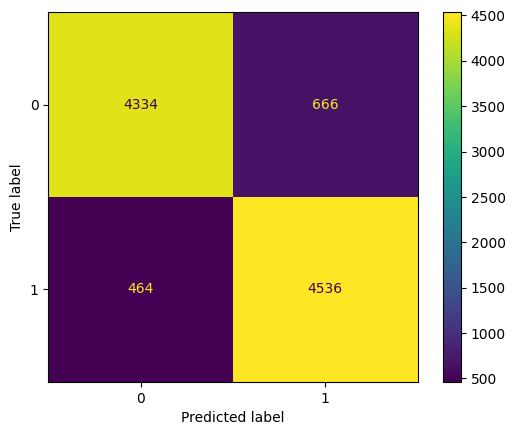

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.87      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



(0.1332, 0.9072)

In [ ]:
from f_func import fmatcon

fmatcon(y_test,y_p_test,clf)

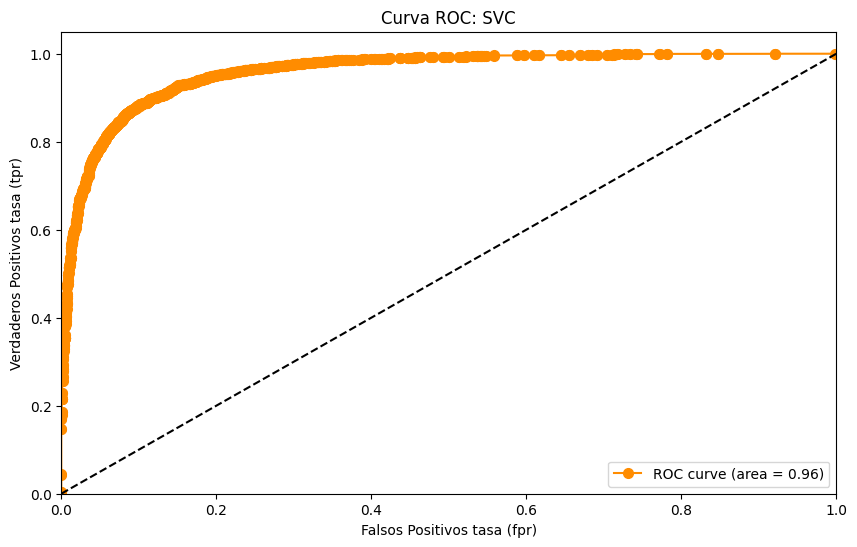

Umbral optimo= 0.5433402538065069


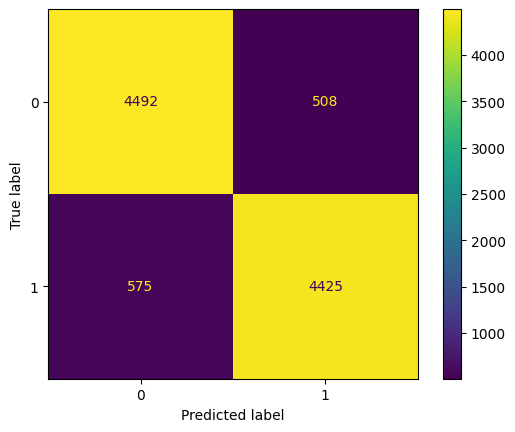

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5000
           1       0.90      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

              precision    recall  f1-score   support

           0     0.8865    0.8984    0.8924      5000
           1     0.8970    0.8850    0.8910      5000

    accuracy                         0.8917     10000
   macro avg     0.8918    0.8917    0.8917     10000
weighted avg     0.8918    0.8917    0.8917     10000



In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score,accuracy_score,classification_report
from f_func import fplotROC,fmatcon
import numpy as np

# Predicciones probabilisticas
y_p_test_P=clf.predict_proba(X_test_nt)

fpr_, tpr_, umbral_ = roc_curve(y_test, y_p_test_P[:,1],)

fplotROC(fpr_,tpr_,'SVC','DarkOrange',marksize=5)

indice_optimo = np.argmax(tpr_ - fpr_)
umbral_optimo = umbral_[indice_optimo]
print(f'Umbral optimo= {umbral_optimo}')

# Se determina las predicciones segun el umbral optimo calculado segun criterio.
y_pP=(y_p_test_P[:,1] >=umbral_optimo).astype(int)

# Se Calcula y muestra matriz de confusion y reporte.
fpr_p,tpr_p=fmatcon(y_test,y_pP,clf)
print(classification_report(y_test, y_pP,digits=4))